In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
# from statsmodels.tsa.arima_model import ARIMA
from datetime import datetime
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import yfinance as yf
!pip install pmdarima
from pmdarima.arima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.graphics.tsaplots import acf,pacf
import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.8 MB/s eta 0:00:00


In [ ]:
# for getting accss of gdrive file
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#import your dataframe
df = pd.read_csv("/content/price.csv")

FileNotFoundError: ignored

In [ ]:
df1 = df["Price"]
df1

0        5124.0
1        5628.3
2        4710.0
3        4940.0
4        6021.7
         ...   
6758    14037.8
6759    14050.3
6760    14033.8
6761    14025.2
6762    16275.0
Name: Price, Length: 6763, dtype: float64

In [ ]:
#set date as index for graph
import pandas as pd

df["Date"] = pd.to_datetime(df["Date"], infer_datetime_format=True)
df = df.set_index("Date")

Text(0, 0.5, 'Price')

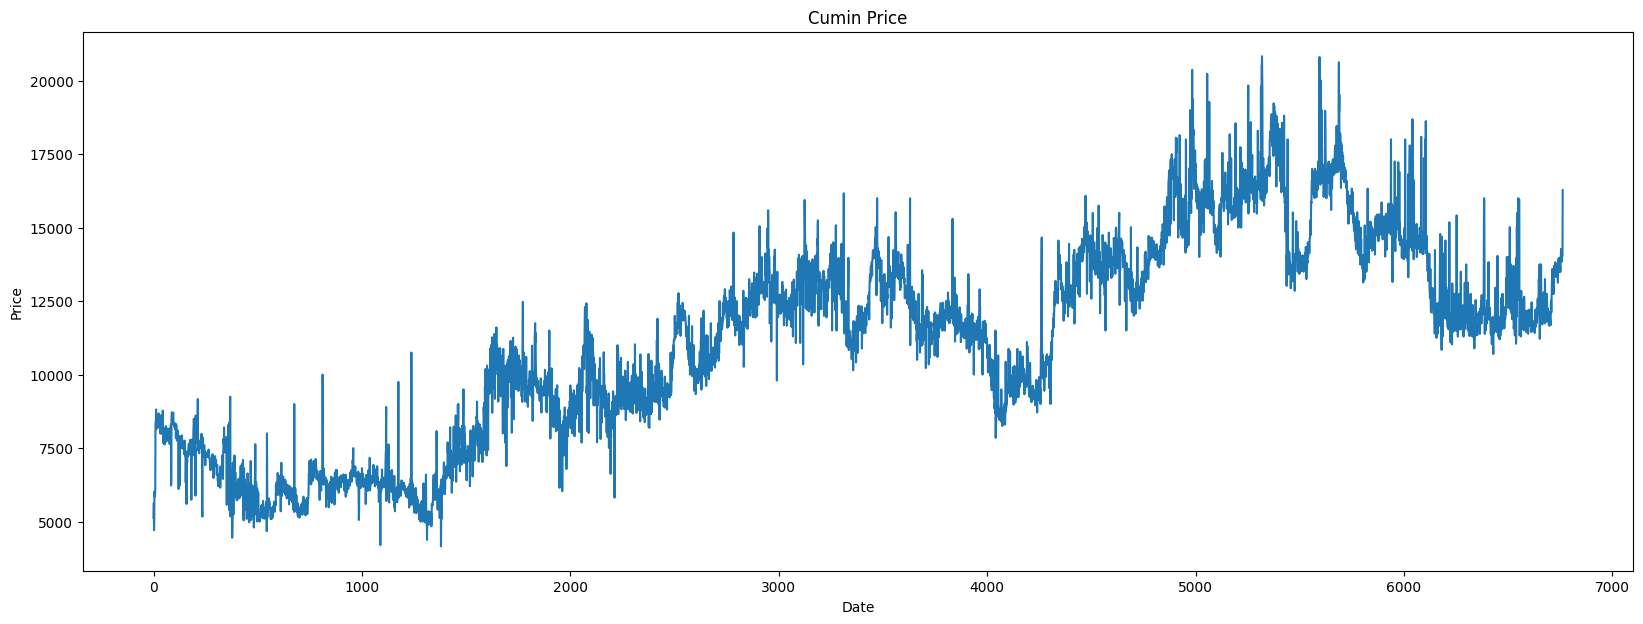

In [ ]:
plt.figure(figsize = (20,7))
plt.plot(df['Price'])
plt.title("Cumin Price")
plt.xlabel('Date')
plt.ylabel('Price')


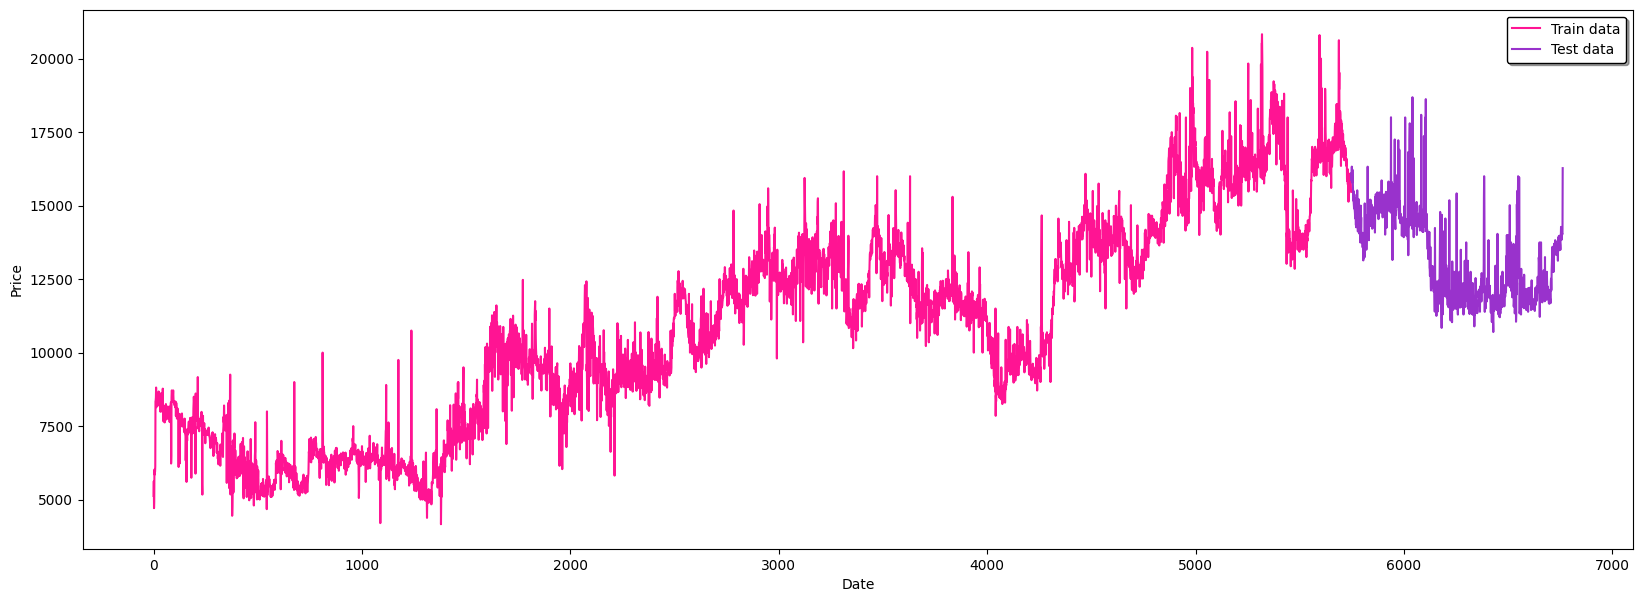

In [ ]:
#split data into train and training set
lf = int(len(df1)*0.85)
train_data=df1[0:lf]
test_data=df1[lf:]
plt.figure(figsize=(20,7))
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(train_data, 'Deeppink', label='Train data')
plt.plot(test_data, 'darkorchid', label='Test data')
plt.legend( shadow=True,edgecolor = 'k')

In [ ]:
model =  auto_arima(train_data,start_p=0, start_d=1, start_q=0,
                          max_p=2, max_d=2, max_q=2, start_P=0,
                          D=1, start_Q=0, max_P=2, max_D=2,
                          max_Q=2, m=7, seasonal=True,
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 40 )

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=93005.378, Time=0.25 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=91159.480, Time=8.22 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=91037.872, Time=7.06 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=93004.825, Time=0.11 sec
 ARIMA(0,0,1)(0,1,0)[7] intercept   : AIC=92472.970, Time=0.96 sec
 ARIMA(0,0,1)(1,1,1)[7] intercept   : AIC=91036.169, Time=11.52 sec
 ARIMA(0,0,1)(1,1,0)[7] intercept   : AIC=91445.949, Time=12.31 sec
 ARIMA(0,0,1)(2,1,1)[7] intercept   : AIC=91036.817, Time=24.94 sec
 ARIMA(0,0,1)(1,1,2)[7] intercept   : AIC=inf, Time=50.53 sec
 ARIMA(0,0,1)(0,1,2)[7] intercept   : AIC=91036.315, Time=19.41 sec
 ARIMA(0,0,1)(2,1,0)[7] intercept   : AIC=91152.215, Time=15.02 sec
 ARIMA(0,0,1)(2,1,2)[7] intercept   : AIC=inf, Time=57.96 sec
 ARIMA(0,0,0)(1,1,1)[7] intercept   : AIC=91948.150, Time=13.30 sec
 ARIMA(1,0,1)(1,1,1)[7] intercept   : AIC=inf, Time=30.45 sec
 ARIMA(0,0,2)(1,1,1)[7] inte

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 5748
Model:             SARIMAX(0, 0, 2)x(1, 1, [1], 7)   Log Likelihood              -45328.754
Date:                             Mon, 08 May 2023   AIC                          90669.509
Time:                                     08:24:00   BIC                          90709.441
Sample:                                          0   HQIC                         90683.407
                                            - 5748                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     14.9491      4.781      3.127      0.002       5.579      24.320
ma.L1          0.3768      0.008     45.940      0.000       0.361       0.393
ma.L2          0.2433      0.009     26.226      0.000       0.225       0.262
ar.S.L7        0.0675      0.016      4.127      0.000       0.035       0.100
ma.S.L7       -0.6683      0.014    -48.725      0.000      -0.695      -0.641
sigma2      4.194e+05   4206.246     99.711      0.000    4.11e+05    4.28e+05
===================================================================================
Ljung-Box (L1) (Q):                  23.42   Jarque-Bera (JB):              7162.95
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.37   Skew:                             0.53
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
prediction = pd.DataFrame(model.predict(n_periods=len(test_data)))
prediction.columns = ["Price"]
prediction

,Price
5748,15842.598360
5749,16093.791579
5750,16353.170536
5751,16311.900179
5752,16194.854115
...,...
6758,18683.886862
6759,18650.064269
6760,18528.796411
6761,18368.965832


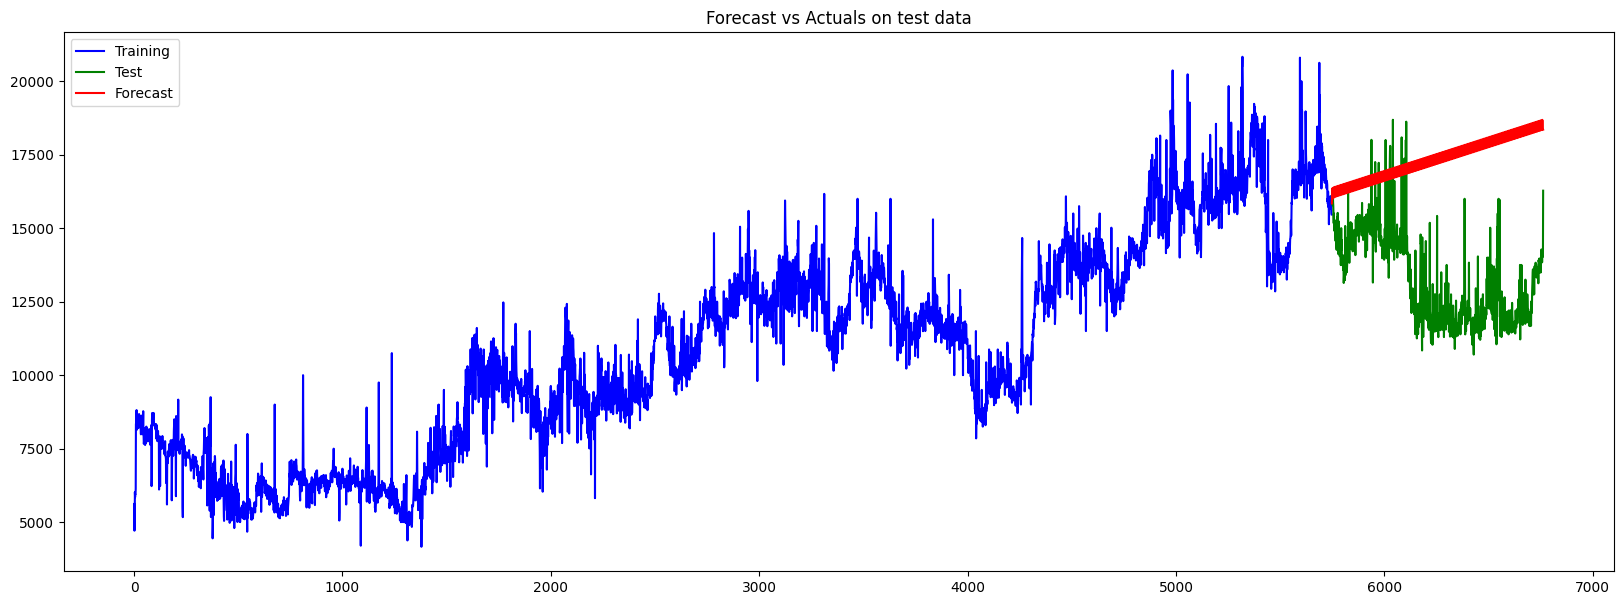

In [ ]:
# Plot the test
plt.figure(figsize=(20,7))
plt.plot(train_data, label='Training', color = 'blue')
plt.plot(test_data, label='Test', color = 'green')
plt.plot(prediction, label='Forecast', color = 'red')
plt.title('Forecast vs Actuals on test data')
plt.legend(loc='upper left')
plt.show()


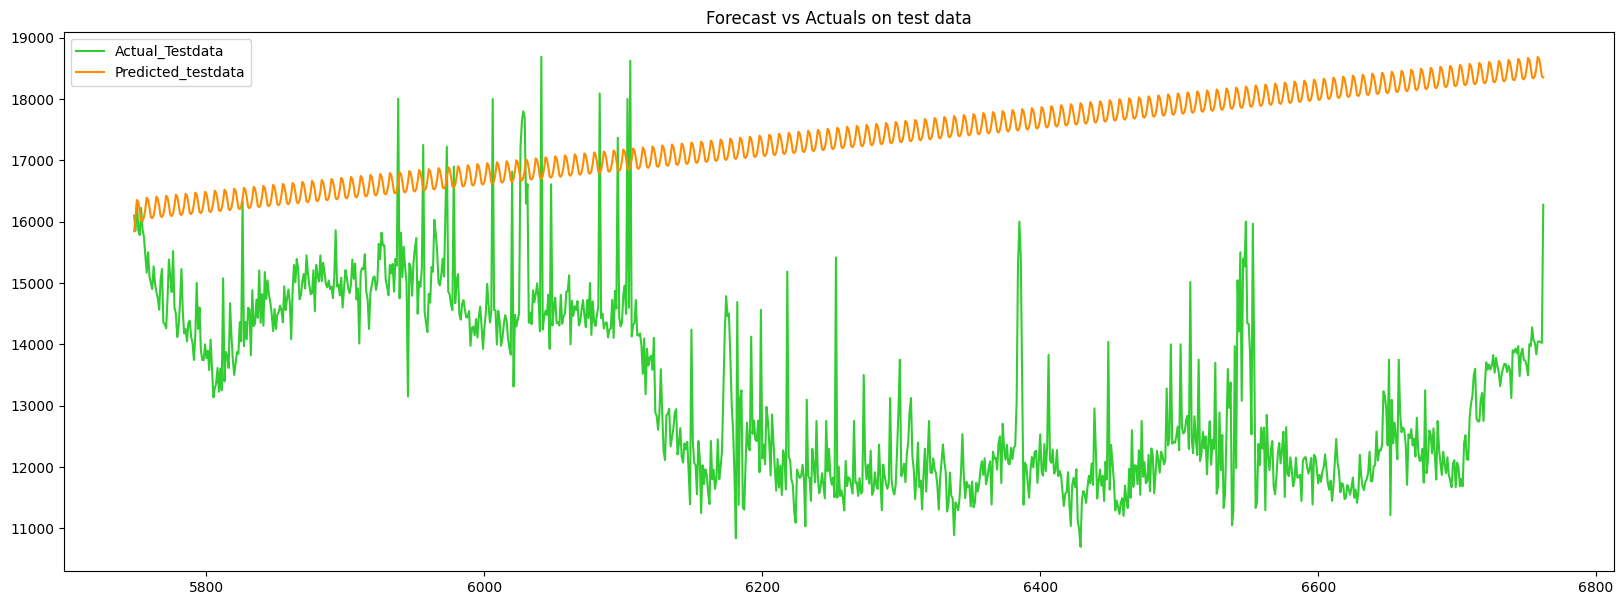

In [ ]:
# Plot the test
plt.figure(figsize=(20,7))
plt.plot(test_data, label='Actual_Testdata', color = 'limegreen')
plt.plot(prediction, label='Predicted_testdata', color = 'darkorange')
plt.title('Forecast vs Actuals on test data')
plt.legend(loc='upper left')
plt.show()

In [ ]:
predictionf = pd.DataFrame(model.predict(n_periods=len(test_data)+365))
prediction.columns = ["Price"]
predict = predictionf[len(test_data):]

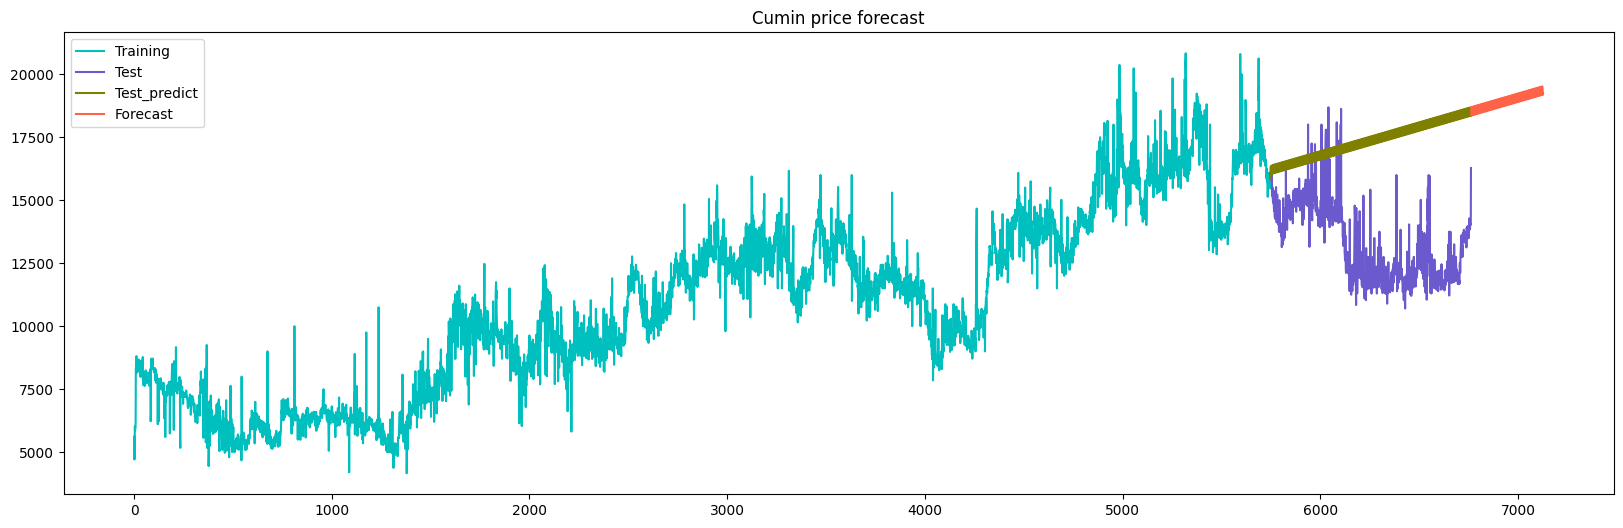

In [ ]:
# Plot
plt.figure(figsize=(20,6))
plt.plot(train_data, label='Training', color = 'c')
plt.plot(test_data, label='Test', color = 'slateblue')
plt.plot(prediction, label='Test_predict', color = 'olive')
plt.plot(predict, label='Forecast', color = 'tomato')
plt.title('Cumin price forecast')
plt.legend(loc='upper left')
plt.show()

In [ ]:
import numpy as np

np.set_printoptions(threshold=np.inf)

prediction

In [ ]:
predict

,0
6763,18393.063526
6764,18517.901539
6765,18699.917657
6766,18666.095064
6767,18544.827206
...,...
7123,19483.665609
7124,19362.397752
7125,19202.567172
7126,19185.045741


In [ ]:
len(predict)

365